<a href="https://colab.research.google.com/github/SobolMaria/goit-ds-hw/blob/main/13_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Преобразование меток в категориальный формат
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Проверка формы данных
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [11]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,058 (414.29 KB)

 Trainable params: 106,058 (414.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6751 - loss: 0.8640 - val_accuracy: 0.8381 - val_loss: 0.4666
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8694 - loss: 0.3537 - val_accuracy: 0.8831 - val_loss: 0.3255
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8950 - loss: 0.2901 - val_accuracy: 0.8926 - val_loss: 0.3044
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9021 - loss: 0.2582 - val_accuracy: 0.8987 - val_loss: 0.2739
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9143 - loss: 0.2266 - val_accuracy: 0.8992 - val_loss: 0.2825
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9212 - loss: 0.2108 - val_accuracy: 0.9041 - val_loss: 0.2915
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9254 - loss: 0.1970 - val_accuracy: 0.9071 - val_loss: 0.2740
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9354 - loss: 0.1777 - val_accuracy: 0

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9064 - loss: 0.5092
0.9075000286102295


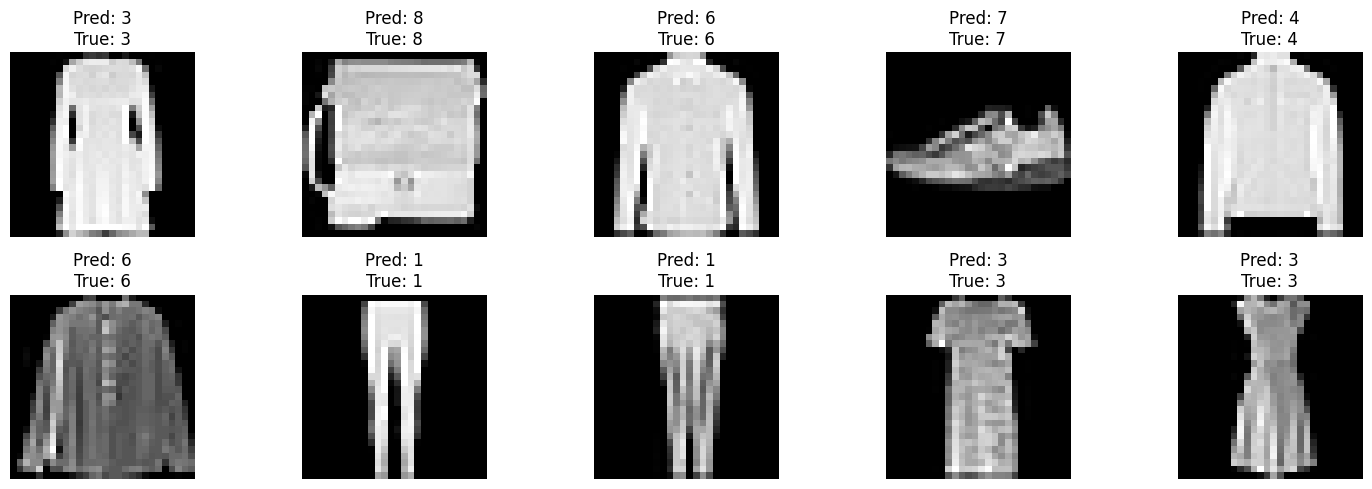

Accuracy on the random sample: 1.0000


In [19]:
import random

num_samples = 10
random_indices = random.sample(range(x_test.shape[0]), num_samples)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

predictions = model(sample_images)
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(sample_labels, axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {predicted_labels[i].numpy()}\nTrue: {true_labels[i].numpy()}")

plt.tight_layout()
plt.show()

correct_predictions = tf.equal(predicted_labels, true_labels)
accuracy_on_samples = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(f"Accuracy on the random sample: {accuracy_on_samples:.4f}")